# Divar Real-State Dataset <br>

----

### Import Essential Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the data

In [3]:
data = pd.read_csv("Divar Dataset/Divar.csv")

/var/folders/9y/lpsdwq1d0bz2t5178sr1rgmr0000gn/T/ipykernel_57756/3783358663.py:1: DtypeWarning: Columns (11,27,29,53) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("Divar Dataset/Divar.csv")


## Exploratory Data Analysis

In [4]:
# Remove the index column
data = data.drop(columns=["Unnamed: 0"])
data.head(5)

,cat2_slug,cat3_slug,city_slug,neighborhood_slug,created_at_month,user_type,description,title,rent_mode,rent_value,...,property_type,regular_person_capacity,extra_person_capacity,cost_per_extra_person,rent_price_on_regular_days,rent_price_on_special_days,rent_price_at_weekends,location_latitude,location_longitude,location_radius
0,temporary-rent,villa,karaj,mehrshahr,2024-08-01 00:00:00,مشاور املاک,۵۰۰متر\n۲۰۰متر بنا دوبلکس\n۳خواب\nاستخر آبگرم ...,باغ ویلا اجاره روزانه استخر داخل لشکرآباد سهیلیه,NaN,NaN,...,NaN,4.0,6,350000.0,1500000.0,3.500000e+09,3500000.0,35.811684,50.936600,500.0
1,residential-sell,apartment-sell,tehran,gholhak,2024-05-01 00:00:00,مشاور املاک,دسترسی عالی به مترو و شریعتی \nمشاعات تمیز \nب...,۶۰ متر قلهک فول امکانات,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0
2,residential-rent,apartment-rent,tehran,tohid,2024-10-01 00:00:00,NaN,تخلیه پایان ماه,آپارتمان ۳ خوابه ۱۳۲ متر,مقطوع,26000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.703865,51.373459,NaN
3,commercial-rent,office-rent,tehran,elahiyeh,2024-06-01 00:00:00,NaN,فرشته تاپ لوکیشن\n۹۰ متر موقعیت اداری\nیک اتاق...,فرشته ۹۰ متر دفتر کار مدرن موقعیت اداری,مقطوع,95000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,residential-sell,apartment-sell,mashhad,emamreza,2024-05-01 00:00:00,مشاور املاک,هلدینگ ساختمانی اکبری\n\nهمراه شما هستیم برای ...,۱۱۵ متری/شمالی رو به آفتاب/اکبری,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# # Analyzing data using d-tale
# import dtale

# d = dtale.show(data)
# d.open_browser()

In [6]:
# Data basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 60 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   cat2_slug                   1000000 non-null  object 
 1   cat3_slug                   999999 non-null   object 
 2   city_slug                   999998 non-null   object 
 3   neighborhood_slug           437139 non-null   object 
 4   created_at_month            1000000 non-null  object 
 5   user_type                   288882 non-null   object 
 6   description                 1000000 non-null  object 
 7   title                       999946 non-null   object 
 8   rent_mode                   352994 non-null   object 
 9   rent_value                  351322 non-null   float64
 10  rent_to_single              19 non-null       object 
 11  rent_type                   103961 non-null   object 
 12  price_mode                  573606 non-null   object 
 13

-> Dataset 1M rows and contains 60 columns:
- 43 object (23 string | 16 boolean | 4 mixed)
- 17 float

In [7]:
# Statistical description of categorical columns
data.describe(include='object')

,cat2_slug,cat3_slug,city_slug,neighborhood_slug,created_at_month,user_type,description,title,rent_mode,rent_to_single,...,has_restroom,has_security_guard,has_barbecue,building_direction,has_pool,has_jacuzzi,has_sauna,floor_material,property_type,extra_person_capacity
count,1000000,999999,999998,437139,1000000,288882,1000000,999946,352994,19,...,406913,31312,31198,323923,29390,28728,28479,405984,27057,24009
unique,6,16,421,1188,46,2,989449,904092,3,2,...,4,2,2,5,2,2,2,8,5,36
top,residential-sell,apartment-sell,tehran,elahiyehblvd,2024-07-01 00:00:00,مشاور املاک,❌فروش ویلا و زمین زیرقیمت منطقه و بدون واسطه ب...,خانه ویلایی,مقطوع,True,...,squat_seat,False,False,south,False,False,False,ceramic,jungle,2
freq,558708,303385,190904,7076,133219,256006,220,1867,292081,18,...,219393,24631,23377,159453,25669,26455,27084,307821,16614,6849


In [8]:
# Statistical description of numerical columns
data.describe(include='number')

,rent_value,price_value,credit_value,transformable_credit,transformed_credit,transformable_rent,transformed_rent,land_size,building_size,regular_person_capacity,cost_per_extra_person,rent_price_on_regular_days,rent_price_on_special_days,rent_price_at_weekends,location_latitude,location_longitude,location_radius
count,3.513220e+05,5.683460e+05,3.520950e+05,3.520850e+05,7.240900e+04,3.512480e+05,7.240900e+04,1.863960e+05,9.803940e+05,29870.000000,1.024100e+04,1.806800e+04,1.046300e+04,1.355100e+04,655608.000000,655608.000000,339699.000000
mean,4.102299e+10,1.736537e+10,4.872084e+10,4.872222e+10,8.557025e+09,4.103164e+10,1.619934e+07,4.165480e+03,4.440648e+03,6.557650,1.209785e+10,1.389016e+11,2.355548e+10,3.156551e+10,34.982108,51.629743,465.149147
std,3.807534e+12,5.878739e+11,4.341346e+12,4.341407e+12,2.064576e+12,3.807935e+12,5.217890e+07,1.218927e+05,1.367118e+05,7.698655,1.103482e+12,7.042335e+12,1.542049e+12,2.434942e+12,2.379169,3.160920,125.896250
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,23.626478,40.162369,0.000000
25%,1.111110e+05,1.400000e+09,1.000000e+08,1.000000e+08,2.000000e+08,1.111110e+05,1.000000e+06,1.100000e+02,7.500000e+01,3.000000,5.000000e+04,4.000000e+05,6.000000e+05,5.500000e+05,34.553551,50.677175,500.000000
50%,5.000000e+06,2.840000e+09,2.500000e+08,2.500000e+08,4.000000e+08,5.000000e+06,6.000000e+06,1.950000e+02,1.030000e+02,4.000000,1.000000e+05,8.000000e+05,1.200000e+06,1.100000e+06,35.723312,51.345791,500.000000
75%,1.200000e+07,5.900000e+09,5.000000e+08,5.000000e+08,8.500000e+08,1.200000e+07,1.500000e+07,2.800000e+02,1.650000e+02,7.000000,2.000000e+05,1.600000e+06,2.500000e+06,2.500000e+06,36.307013,51.805291,500.000000
max,1.000000e+15,1.000000e+14,1.000000e+15,1.000000e+15,5.555556e+14,1.000000e+15,3.000000e+09,1.000000e+07,1.000000e+07,50.000000,1.111111e+14,5.006007e+14,1.111111e+14,2.002503e+14,40.358055,74.511620,500.000000


In [9]:
# Show Value-Count of non-numeric columns
for col in data.select_dtypes(include='object').columns:
    print(f"{data[col].value_counts()}")
    print("-" * 50)

cat2_slug
residential-sell        558708
residential-rent        276558
commercial-rent          76567
commercial-sell          38861
temporary-rent           29903
real-estate-services     19403
Name: count, dtype: int64
--------------------------------------------------
cat3_slug
apartment-sell                        303385
apartment-rent                        211880
plot-old                              133570
house-villa-sell                      121753
house-villa-rent                       64678
shop-rent                              45993
shop-sell                              21855
office-rent                            21418
suite-apartment                        16465
presell                                15781
villa                                  12899
industry-agriculture-business-sell     11851
industry-agriculture-business-rent      9155
office-sell                             5155
partnership                             3622
workspace                                5

**According to our observations:**
- Some columns contain a mix of numerical and string values:<br>
`floor` - `total_floors_count`, `has_balcony`, `extra_person_capacity`

- Some columns' values are stored as string, but they're number and must be converted to integers (or bin them).

- Some string columns are **Farsi**.<br>
`user_type` - `rent_mode` - `price_mode` - `credit_mode` - `construction_year` - `rooms_count`

- Some columns contain a value called '`unselect`' which can be converted to **NaN**.

- There are two time-related columns.<br>
 `created_at_month` - `construction_year`

- There are two coloumn, `rooms_count` and `unit_per_floor`, that might be better to bin them.

#### Check Memory Usage

In [10]:
print(f"{data.memory_usage(deep=True).sum() / 1e6} Mb")# Current memory usage

2729.286698 Mb


In [11]:
#‌ ‌Reduce‌ ‌memory‌ ‌usage‌ ‌by‌ ‌converting‌ ‌column‌ ‌data‌ ‌types‌ ‌
def reduce_memory_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    # Compute memory usage
    start_mem = df.memory_usage().sum() / 1024**2
    # Iterate through each column
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    # Compute memory usage after reduction
    end_mem = df.memory_usage().sum() / 1024**2
    # Print out the difference between memory usage before and after
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [12]:
# Reduce memory usage
data = reduce_memory_usage(data)

Mem. usage decreased to 385.28 Mb (15.8% reduction)


/var/folders/9y/lpsdwq1d0bz2t5178sr1rgmr0000gn/T/ipykernel_57756/180345247.py:22: RuntimeWarning: overflow encountered in cast
  if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
/var/folders/9y/lpsdwq1d0bz2t5178sr1rgmr0000gn/T/ipykernel_57756/180345247.py:22: RuntimeWarning: overflow encountered in cast
  if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
/var/folders/9y/lpsdwq1d0bz2t5178sr1rgmr0000gn/T/ipykernel_57756/180345247.py:22: RuntimeWarning: overflow encountered in cast
  if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
/var/folders/9y/lpsdwq1d0bz2t5178sr1rgmr0000gn/T/ipykernel_57756/180345247.py:22: RuntimeWarning: overflow encountered in cast
  if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
/var/folders/9y/lpsdwq1d0bz2t5178sr1rgmr0000gn/T/ipykernel_57756/180345247.py:22: RuntimeWarning: overflow encountered in cast
  if c_min > np.finfo(np.float16).min and c_max < np.finfo(np

In [13]:
print(f"{data.memory_usage(deep=True).sum() / 1e6} Mb") # New memory usage

2653.286698 Mb


#### Check Missing Values

More than **90%**

-> 19 Columns

In [14]:
# Print Columns that has more than 90% missing values
temp = (data.isna().sum() / len(data) * 100).astype(np.float32)
temp[temp > 90].sort_values(ascending=False)

rent_to_single                99.998100
cost_per_extra_person         98.975899
rent_price_on_special_days    98.953697
rent_price_at_weekends        98.644897
rent_price_on_regular_days    98.193199
extra_person_capacity         97.599098
property_type                 97.294296
has_sauna                     97.152100
has_jacuzzi                   97.127197
has_pool                      97.060997
regular_person_capacity       97.013000
has_barbecue                  96.880203
has_security_guard            96.868797
has_gas                       96.656998
has_water                     96.655602
has_electricity               96.655502
has_business_deed             96.532097
transformed_credit            92.759102
transformed_rent              92.759102
dtype: float32

More than **75%**

-> 21 Columns

In [15]:
# Print Columns that has more than 75% missing values
temp = (data.isna().sum() / len(data) * 100).astype(np.float32)
temp[temp > 75].sort_values(ascending=False)

rent_to_single                99.998100
cost_per_extra_person         98.975899
rent_price_on_special_days    98.953697
rent_price_at_weekends        98.644897
rent_price_on_regular_days    98.193199
extra_person_capacity         97.599098
property_type                 97.294296
has_sauna                     97.152100
has_jacuzzi                   97.127197
has_pool                      97.060997
regular_person_capacity       97.013000
has_barbecue                  96.880203
has_security_guard            96.868797
has_gas                       96.656998
has_water                     96.655602
has_electricity               96.655502
has_business_deed             96.532097
transformed_rent              92.759102
transformed_credit            92.759102
rent_type                     89.603897
land_size                     81.360397
dtype: float32

More than **50%**

-> 41 Columns

In [16]:
# Print Columns that has more than 50% missing values
temp = (data.isna().sum() / len(data) * 100).astype(np.float32)
temp[temp > 50].sort_values(ascending=False)

rent_to_single                99.998100
cost_per_extra_person         98.975899
rent_price_on_special_days    98.953697
rent_price_at_weekends        98.644897
rent_price_on_regular_days    98.193199
extra_person_capacity         97.599098
property_type                 97.294296
has_sauna                     97.152100
has_jacuzzi                   97.127197
has_pool                      97.060997
regular_person_capacity       97.013000
has_barbecue                  96.880203
has_security_guard            96.868797
has_gas                       96.656998
has_water                     96.655602
has_electricity               96.655502
has_business_deed             96.532097
transformed_rent              92.759102
transformed_credit            92.759102
rent_type                     89.603897
land_size                     81.360397
deed_type                     74.654198
user_type                     71.111801
unit_per_floor                69.771698
total_floors_count            69.564796


Less than **50%**

-> 19 Columns

In [17]:
# Print Columns that has less than 50% missing values
temp = (data.isna().sum() / len(data) * 100).astype(np.float32)
temp[temp <= 50].sort_values(ascending=False)

has_balcony           49.358898
is_rebuilt            47.053001
floor                 45.825199
has_elevator          45.825100
price_value           43.165401
price_mode            42.639400
location_latitude     34.439201
location_longitude    34.439201
has_warehouse         27.184500
has_parking           27.184401
construction_year     18.417200
rooms_count           15.410100
building_size          1.960600
title                  0.005400
city_slug              0.000200
cat3_slug              0.000100
description            0.000000
created_at_month       0.000000
cat2_slug              0.000000
dtype: float32

In [20]:
del temp

The **Bar chart** of the number of non-missing values in each column.

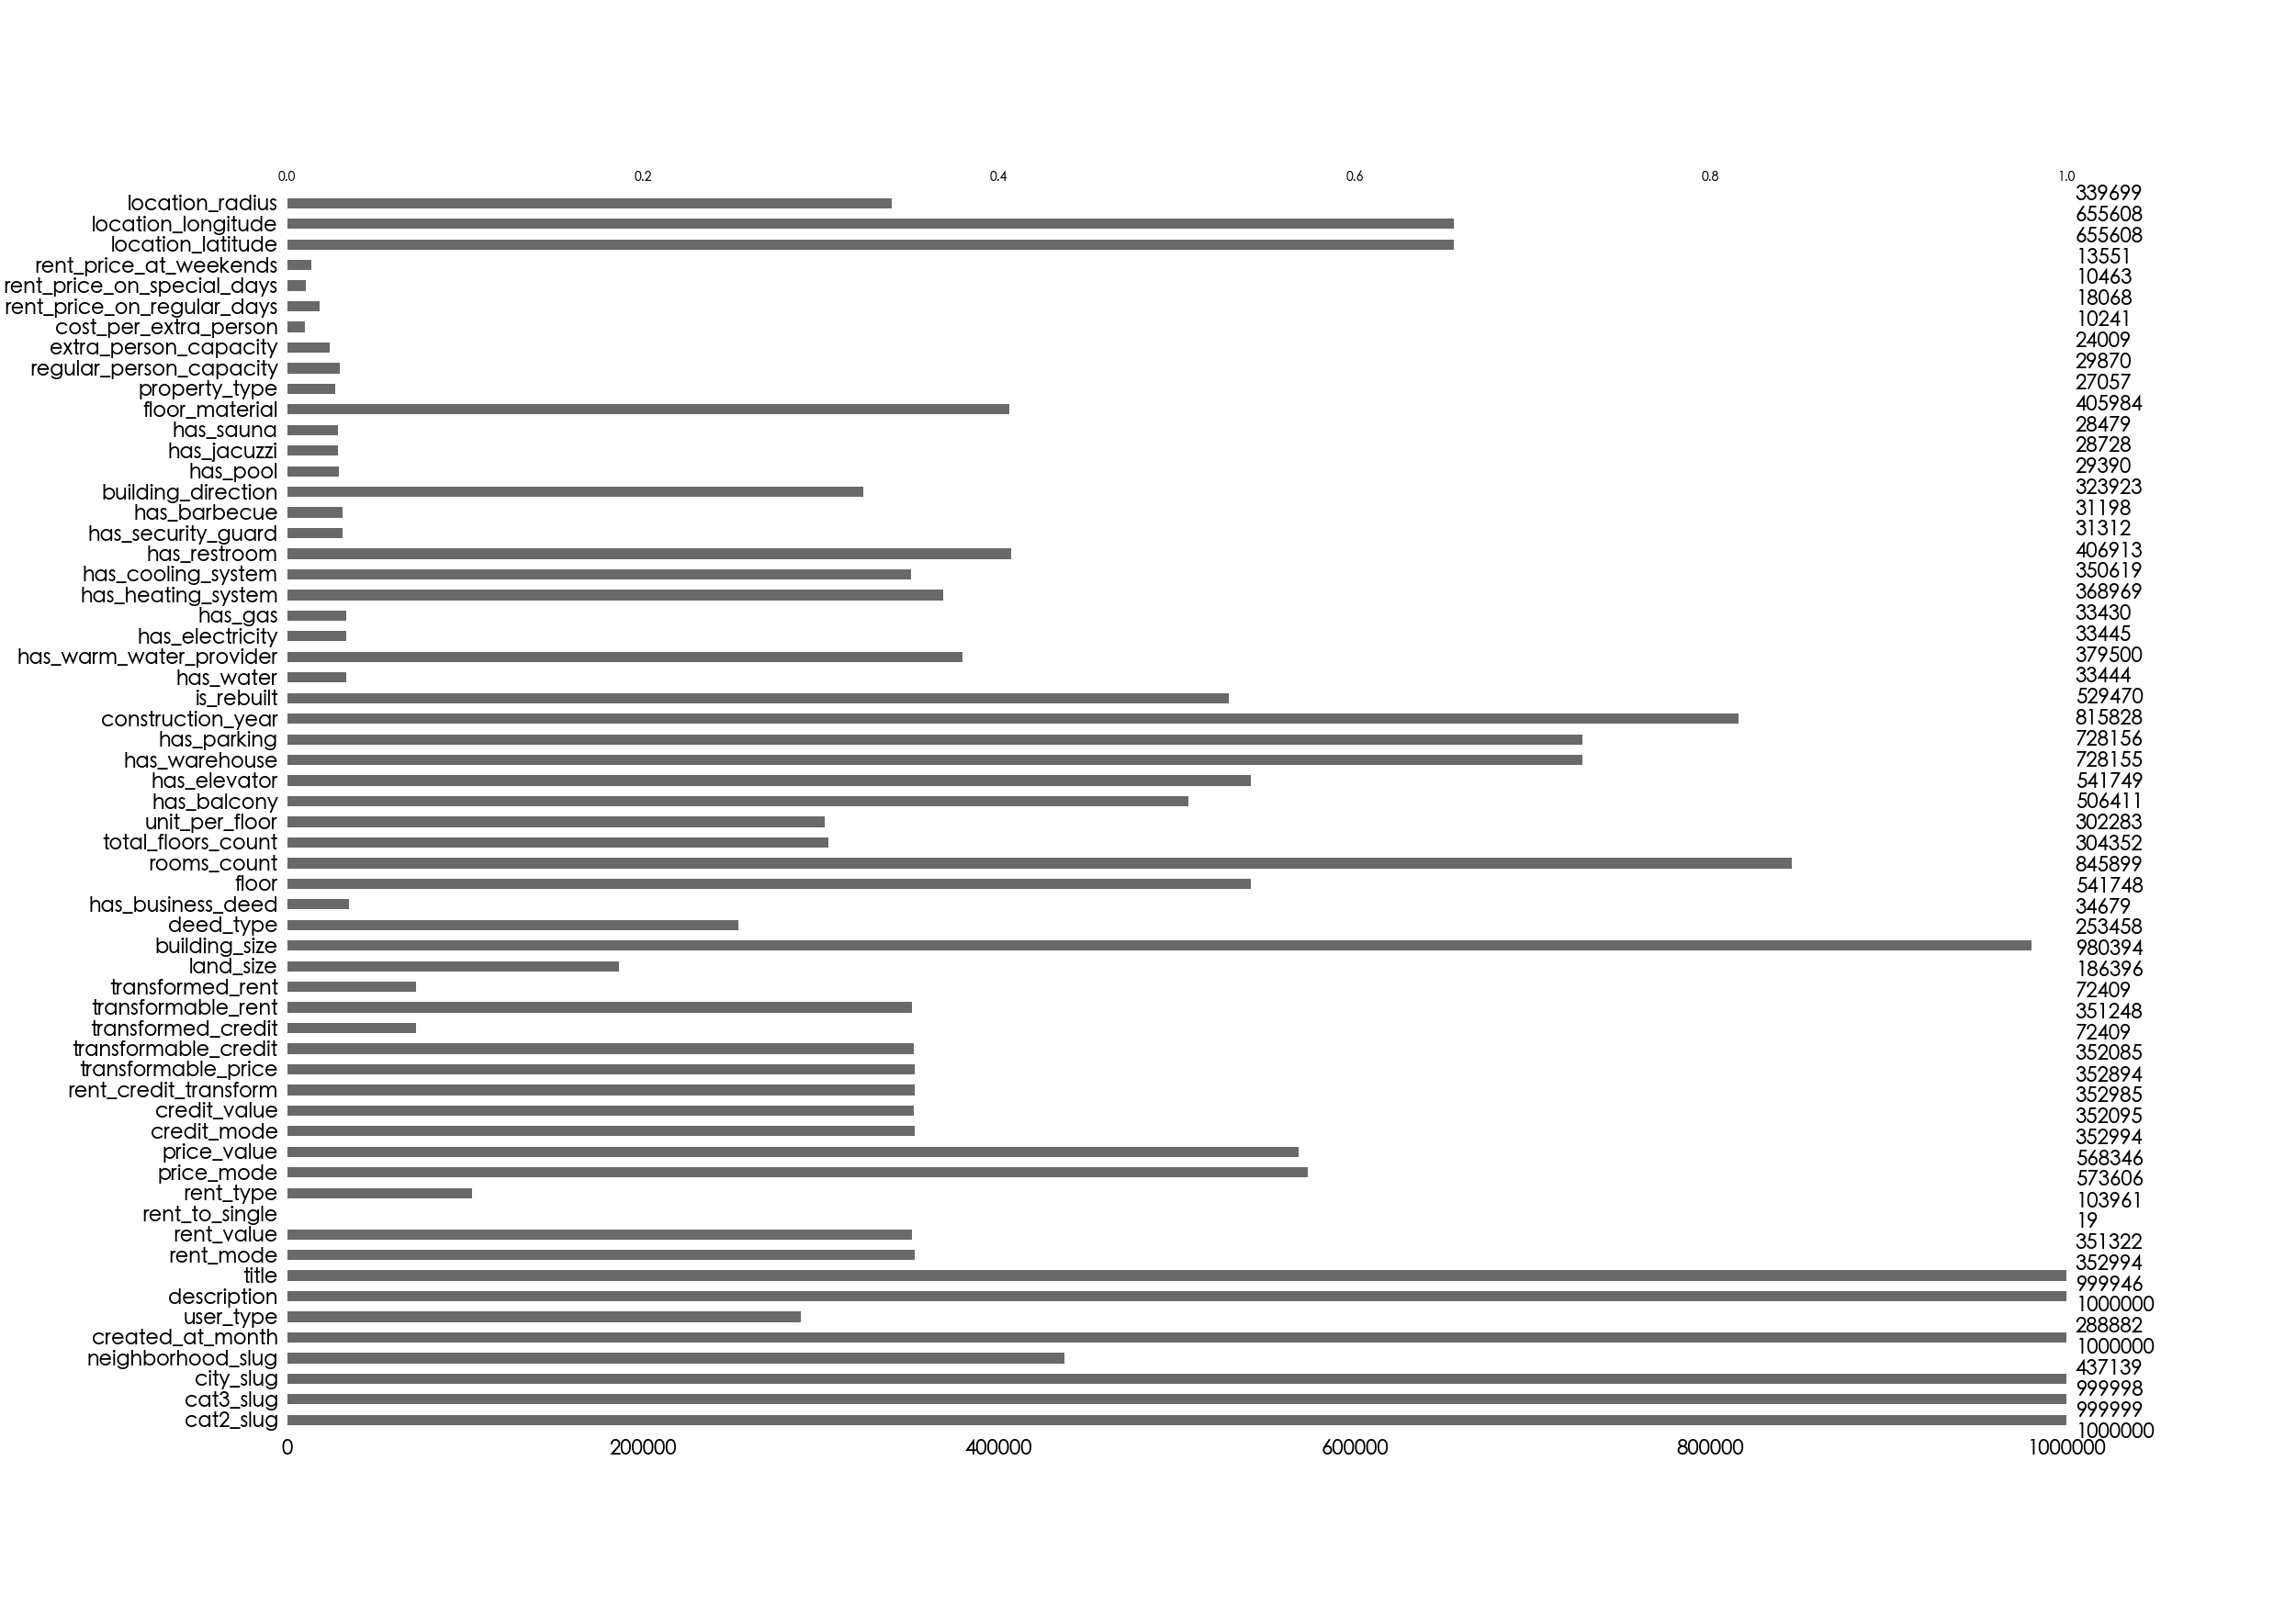

The dendogram of missingness describing correlation of variables by grouping them:

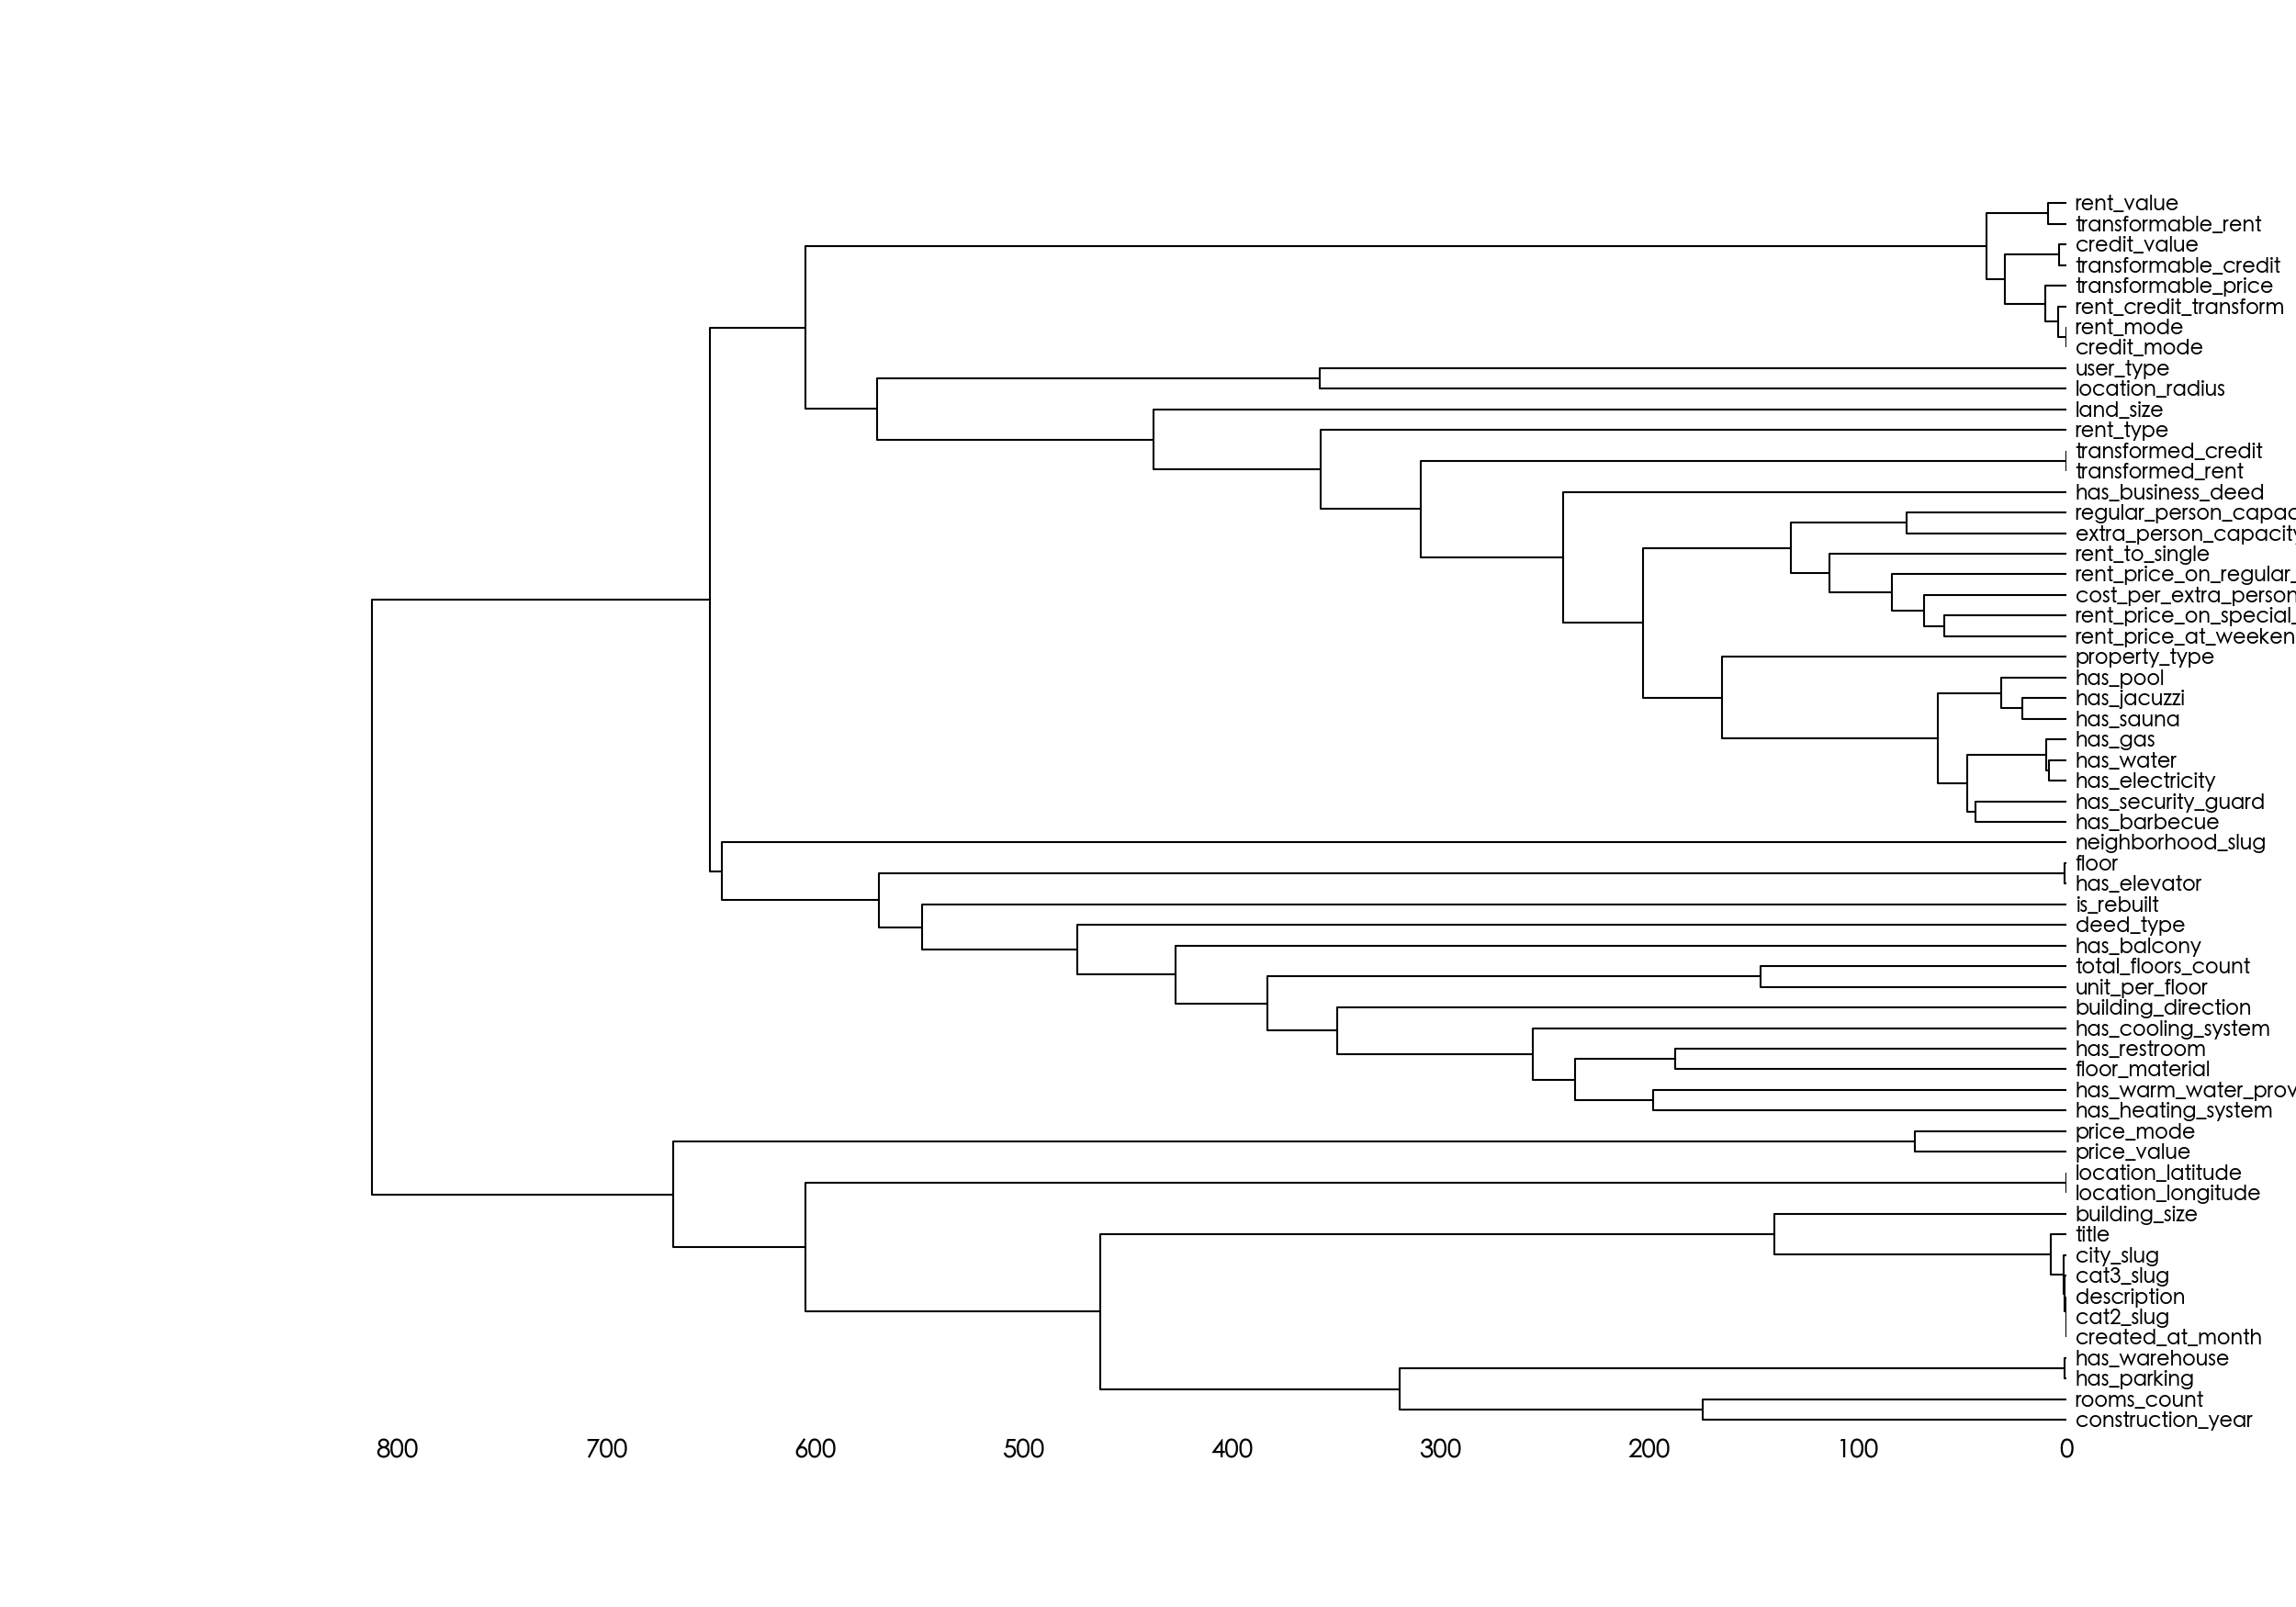

#### Check Duplicate Rows

In [18]:
data.duplicated().sum()

np.int64(106)

-> There are 106 duplicated rows.